<a href="https://colab.research.google.com/github/Sakshi869/BCG-internship-project/blob/main/BCG_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Descriptive Analysis:**
1. What is the distribution of electricity consumption over the past 12 months (cons_12m)?
2. How does the subscribed power (pow_max) vary across clients?

**Time Series Analysis:**
1. How has electricity consumption (cons_last_month) changed over time?

**Client Behavior Analysis:**
1. How many clients have both electricity and gas subscriptions (has_gas)?
2. What is the distribution of the number of active products and services (nb_prod_act) for clients?

**Margin Analysis:**
1. How does the gross margin on power subscription (margin_gross_pow_ele) vary for different clients?
2. Is there a relationship between the number of active products/services (nb_prod_act) and net margin on power subscription (margin_net_pow_ele)?

**Churn Analysis:**
1. What percentage of clients have churned (churn) over the next 3 months?
2. Is there a correlation between churn rate and subscribed power (pow_max)?

**Price Analysis:**
1. How do energy prices vary across different periods (off peak, peak, mid peak) for clients?


**Campaign Analysis:**
1. Which electricity campaign (origin_up) has the highest number of subscribers?
2. How has the subscription count changed over time for different campaigns?



In [1]:
# importing liabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importing data sets
df1=pd.read_csv('/content/client_data.csv')
df2=pd.read_csv('/content/price_data.csv')


In [4]:
# Analysing datasets
df1.shape

(14606, 26)

In [5]:
df2.shape

(35567, 8)

In [6]:
df1.describe(include='all')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606,14606,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,...,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000
unique,14606,8,NaN,NaN,NaN,1796,368,2129,386,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,NaN,NaN,NaN,01-08-2009,01-02-2016,01-11-2015,23-06-2015,NaN,...,f,NaN,NaN,NaN,NaN,NaN,NaN,lxidpiddsbxsbosboudacockeimpuepw,NaN,NaN
freq,1,6754,NaN,NaN,NaN,95,145,721,587,NaN,...,11955,NaN,NaN,NaN,NaN,NaN,NaN,7097,NaN,NaN
mean,NaN,NaN,1.592203e+05,2.809238e+04,16090.269752,NaN,NaN,NaN,NaN,1868.614880,...,NaN,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,NaN,18.135136,0.097152
std,NaN,NaN,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,...,NaN,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,NaN,13.534743,0.296175
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,3.300000,0.000000
25%,NaN,NaN,5.674750e+03,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,494.995000,...,NaN,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,NaN,12.500000,0.000000
50%,NaN,NaN,1.411550e+04,0.000000e+00,792.500000,NaN,NaN,NaN,NaN,1112.875000,...,NaN,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,NaN,13.856000,0.000000
75%,NaN,NaN,4.076375e+04,0.000000e+00,3383.000000,NaN,NaN,NaN,NaN,2401.790000,...,NaN,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,NaN,19.172500,0.000000


In [7]:
df2.describe(include='all')

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,35567,35567,35567.000000,35567.000000,35566.000000,35566.000000,35566.000000,35566.000000
unique,2967,12,NaN,NaN,NaN,NaN,NaN,NaN
top,038af19179925da21a25619c5a24b745,01-08-2015,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,2967,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.140710,0.055145,0.031862,43.276702,11.013813,6.688954
std,NaN,NaN,0.024268,0.050221,0.036680,5.221083,12.866891,7.837569
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.125748,0.000000,0.000000,40.728885,0.000000,0.000000
50%,NaN,NaN,0.145859,0.085483,0.000000,44.266930,0.000000,0.000000
75%,NaN,NaN,0.151367,0.102232,0.072900,44.444710,24.339581,16.226389


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35567 entries, 0 to 35566
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35567 non-null  object 
 1   price_date          35567 non-null  object 
 2   price_off_peak_var  35567 non-null  float64
 3   price_peak_var      35567 non-null  float64
 4   price_mid_peak_var  35566 non-null  float64
 5   price_off_peak_fix  35566 non-null  float64
 6   price_peak_fix      35566 non-null  float64
 7   price_mid_peak_fix  35566 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.2+ MB


In [10]:
df1.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30-03-2010,30-03-2016,30-03-2010,31-03-2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,13-01-2010,07-03-2016,13-01-2010,09-03-2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [11]:
df2.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,01-01-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,01-02-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,01-03-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,01-04-2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,01-05-2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [12]:
df1.tail()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,24-05-2012,08-05-2016,08-05-2015,26-05-2014,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,27-08-2012,27-08-2016,27-08-2012,28-08-2015,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,08-02-2012,07-02-2016,08-02-2012,09-02-2015,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,30-08-2012,30-08-2016,30-08-2012,31-08-2015,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,18-12-2009,17-12-2016,18-12-2009,21-12-2015,762.41,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [13]:
df2.tail()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
35562,cae57c4b7bff14e3b39390e85f324ee1,01-06-2015,0.127497,0.105821,0.075731,40.728885,24.43733,16.291555
35563,cae57c4b7bff14e3b39390e85f324ee1,01-07-2015,0.127497,0.105821,0.075731,40.728885,24.43733,16.291555
35564,cae57c4b7bff14e3b39390e85f324ee1,01-08-2015,0.119336,0.101652,0.075677,40.728885,24.43733,16.291555
35565,cae57c4b7bff14e3b39390e85f324ee1,01-09-2015,0.119336,0.101652,0.075677,40.728885,24.43733,16.291555
35566,cae57c4b7bff14e3b39390e85f324ee1,01-10-2015,0.119336,0.100000,NaN,NaN,NaN,NaN


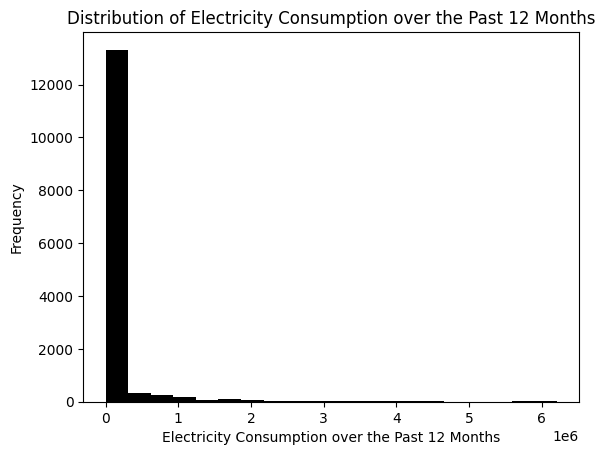

In [14]:
# What is the distribution of electricity consumption over the past 12 months (cons_12m) ?
plt.hist(df1['cons_12m'],bins=20,color='black')
plt.xlabel('Electricity Consumption over the Past 12 Months')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity Consumption over the Past 12 Months')
plt.show()

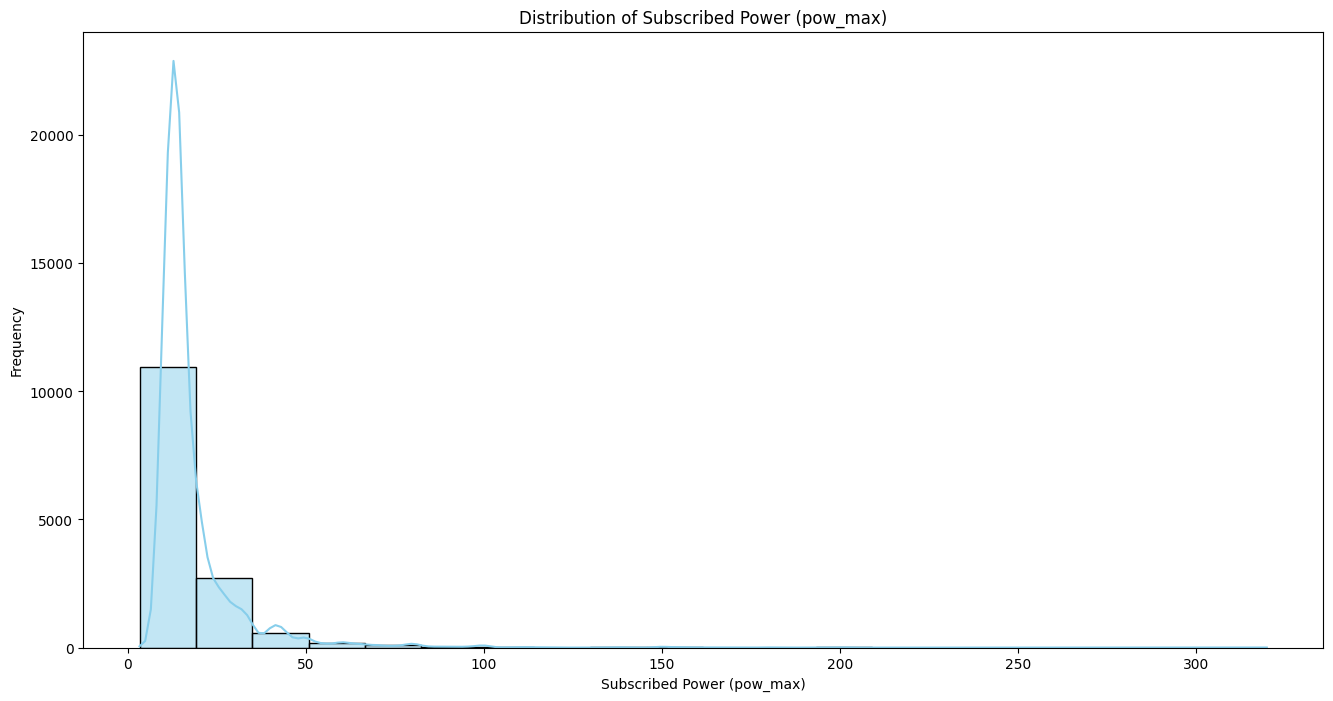

In [15]:
# How does the subscribed power (pow_max) vary across clients ?
subscribe_power=df1['pow_max']
plt.figure(figsize=(16,8))
sns.histplot(subscribe_power, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Subscribed Power (pow_max)')
plt.xlabel('Subscribed Power (pow_max)')
plt.ylabel('Frequency')
plt.show()

In [16]:
# How has electricity consumption (cons_last_month) changed over time ?
df1['date_activ']=pd.to_datetime(df1['date_activ'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  object        
 7   date_modif_prod                 14606 non-null  object        
 8   date_renewal                    14606 non-null  object        
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

<ipython-input-16-cb7157254e32>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['date_activ']=pd.to_datetime(df1['date_activ'])


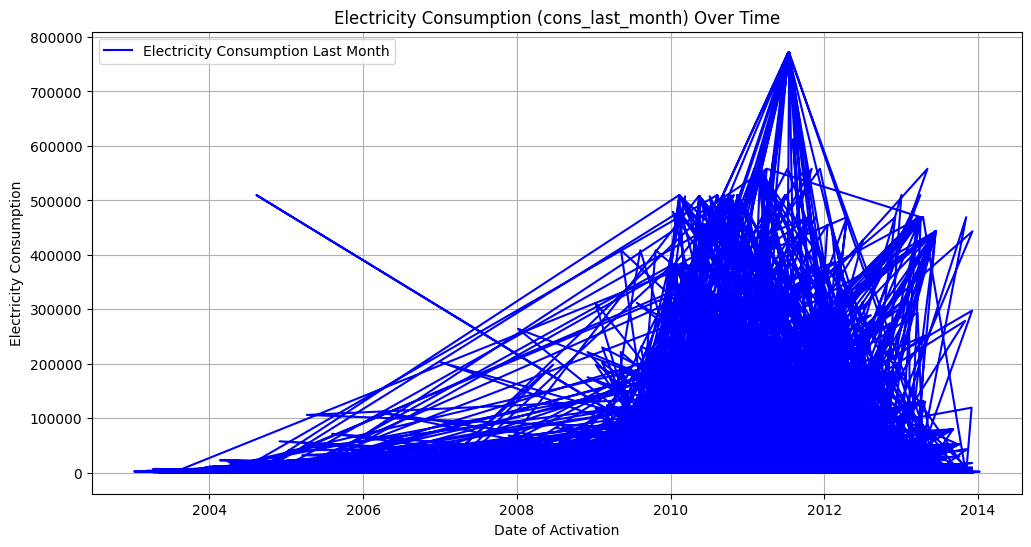

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df1['date_activ'], df1['cons_last_month'], label='Electricity Consumption Last Month', color='b')
plt.xlabel('Date of Activation')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption (cons_last_month) Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# How many clients have both electricity and gas subscriptions (has_gas)?
clients_with_gas=df1[df1['has_gas']==1].shape[0]
print("Number of clients with both electricity and gas subscriptions:", clients_with_gas)

Number of clients with both electricity and gas subscriptions: 0


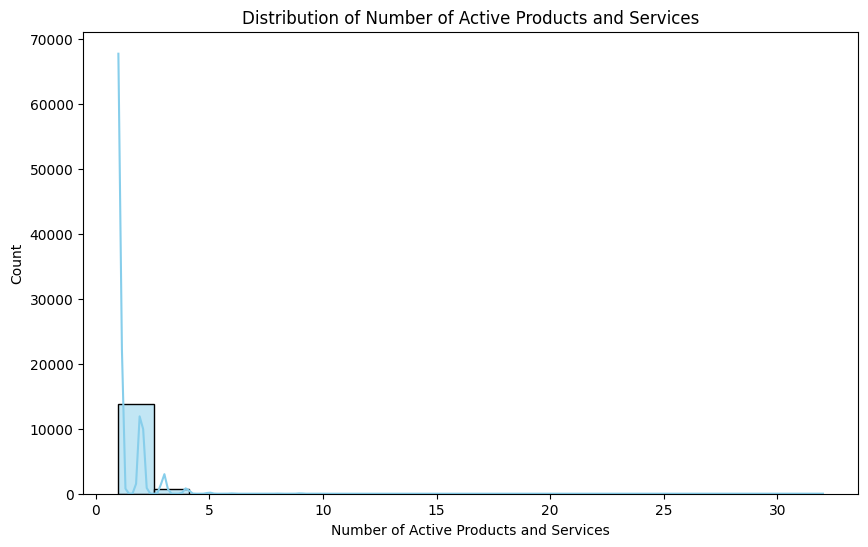

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df1['nb_prod_act'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Number of Active Products and Services')
plt.xlabel('Number of Active Products and Services')
plt.ylabel('Count')
plt.show()

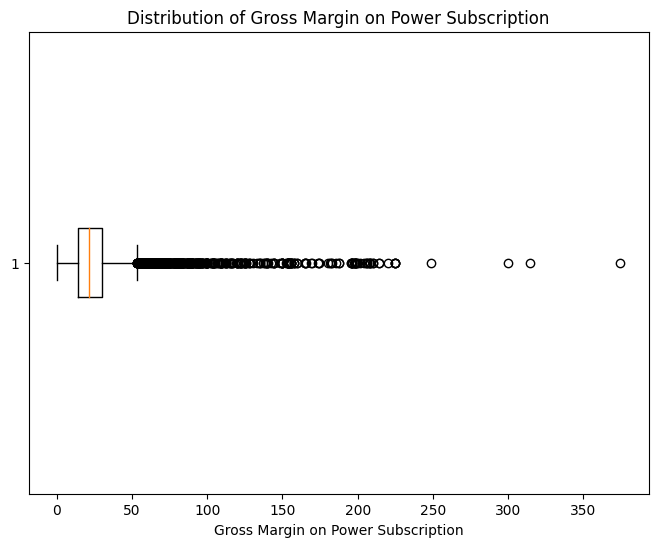

In [20]:
# How does the gross margin on power subscription (margin_gross_pow_ele) vary for different clients?
selected_columns=['margin_gross_pow_ele']

data_selected = df1[selected_columns]

# Plot a box plot to visualize the distribution of gross margin
plt.figure(figsize=(8, 6))
plt.boxplot(df1['margin_gross_pow_ele'], vert=False)
plt.xlabel('Gross Margin on Power Subscription')
plt.title('Distribution of Gross Margin on Power Subscription')
plt.show()






<ipython-input-21-7dc46eb4e3d6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


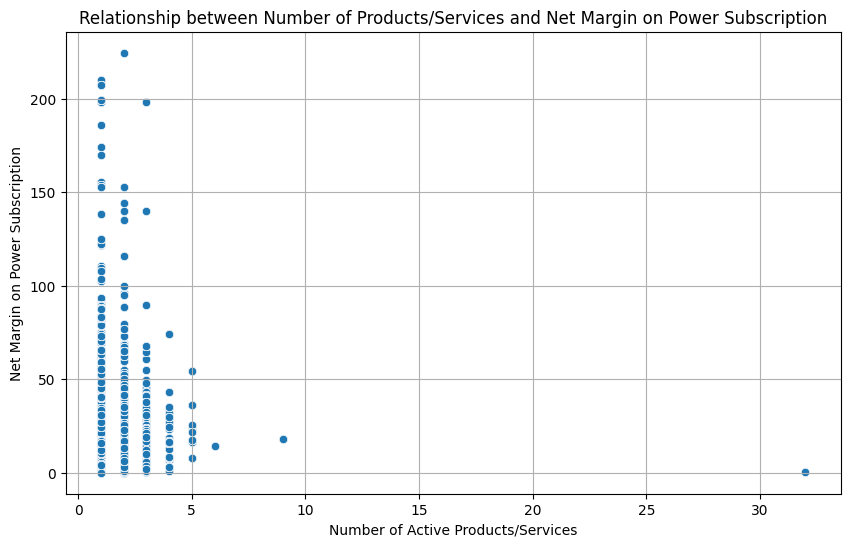

In [21]:
# Is there a relationship between the number of active products/services (nb_prod_act) and net margin on power subscription (margin_net_pow_ele)?

merged_data = pd.merge(df1,df2, on='id', how='inner')

# Filter relevant columns
filtered_data = merged_data[['nb_prod_act', 'margin_net_pow_ele']]

# Drop rows with missing values
filtered_data.dropna(inplace=True)

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='nb_prod_act', y='margin_net_pow_ele')
plt.title('Relationship between Number of Products/Services and Net Margin on Power Subscription')
plt.xlabel('Number of Active Products/Services')
plt.ylabel('Net Margin on Power Subscription')
plt.grid(True)
plt.show()


In [22]:
# What percentage of clients have churned (churn) over the next 3 months?
total_clients=len(df1)
churned_clients=df1['churn'].sum()
percentage_churned = (churned_clients / total_clients) * 100
percentage_churned
print(f"Percentage of clients who have churned: {percentage_churned:.2f}%")

Percentage of clients who have churned: 9.72%


Correlation between churn and subscribed power (pow_max): 0.04


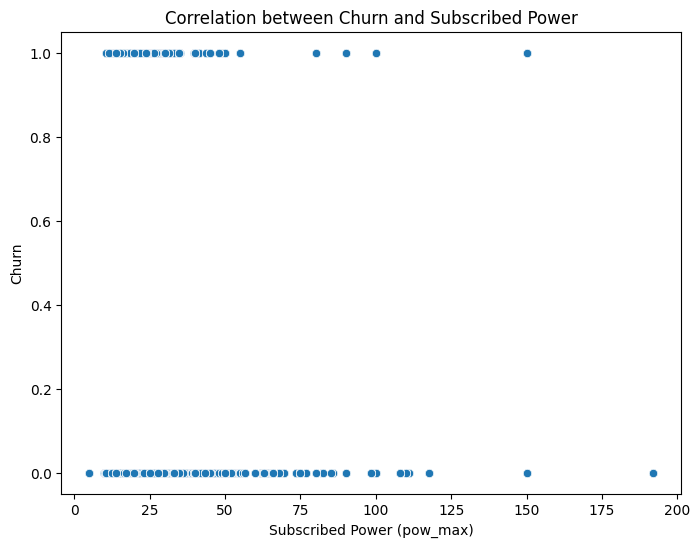

In [25]:
# Is there a correlation between churn rate and subscribed power (pow_max) ?

# Merge the data with price data based on 'id'
merged_data = pd.merge(df1, df2, on='id')

# Calculate the correlation between churn and subscribed power
correlation = merged_data['churn'].corr(merged_data['pow_max'])

# Print the correlation coefficient
print(f'Correlation between churn and subscribed power (pow_max): {correlation:.2f}')

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pow_max', y='churn', data=merged_data)
plt.xlabel('Subscribed Power (pow_max)')
plt.ylabel('Churn')
plt.title('Correlation between Churn and Subscribed Power')
plt.show()


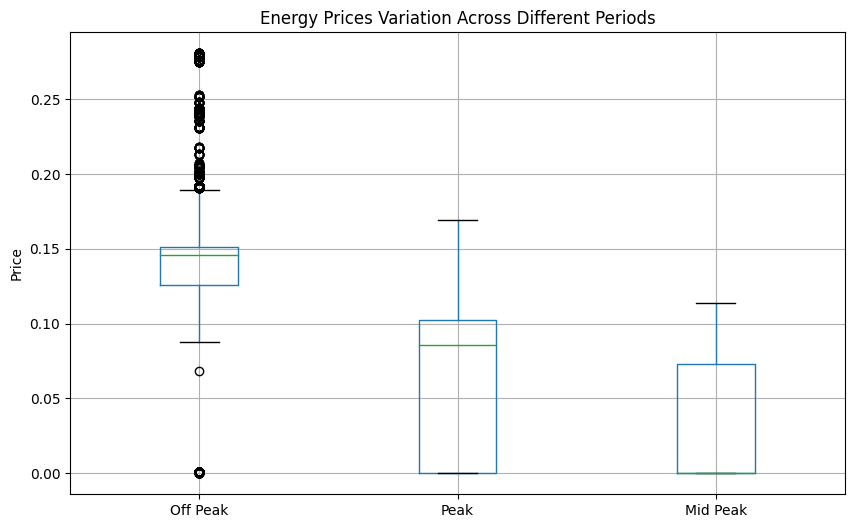

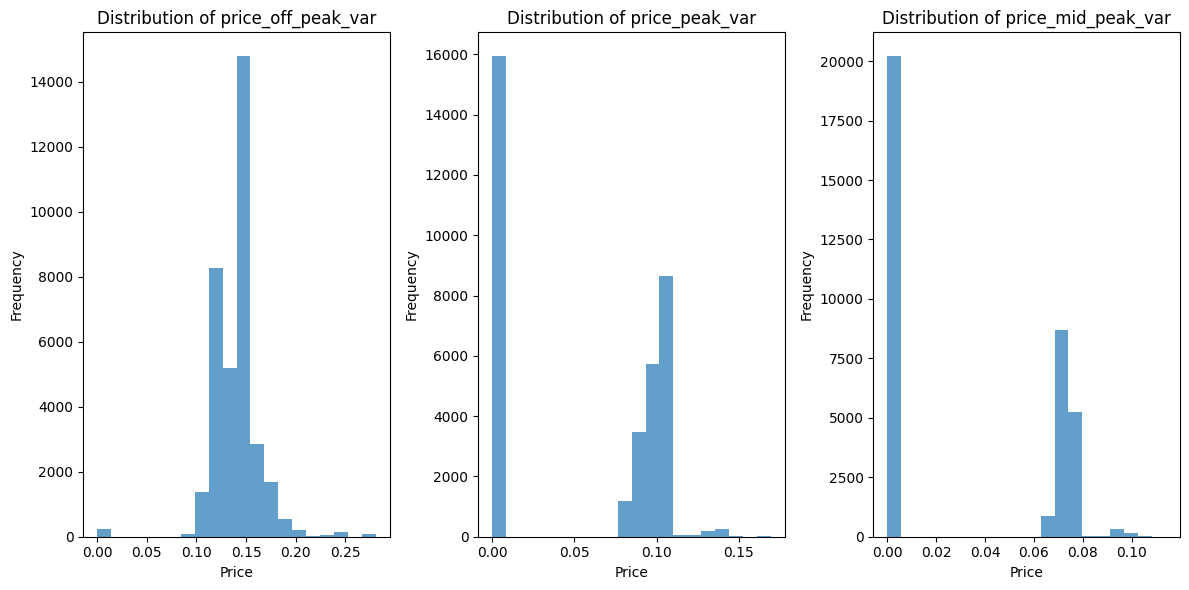

In [26]:
# How do energy prices vary across different periods (off peak, peak, mid peak) for clients?

# Select relevant columns for analysis
price_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']

# Plotting box plots to visualize the distribution of prices for each period
plt.figure(figsize=(10, 6))
df2[price_cols].boxplot()
plt.title('Energy Prices Variation Across Different Periods')
plt.ylabel('Price')
plt.xticks(range(1, len(price_cols) + 1), ['Off Peak', 'Peak', 'Mid Peak'])
plt.show()

# Plotting histograms to visualize the distribution of prices for each period
plt.figure(figsize=(12, 6))
for i, col in enumerate(price_cols, start=1):
    plt.subplot(1, len(price_cols), i)
    plt.hist(df2[col], bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


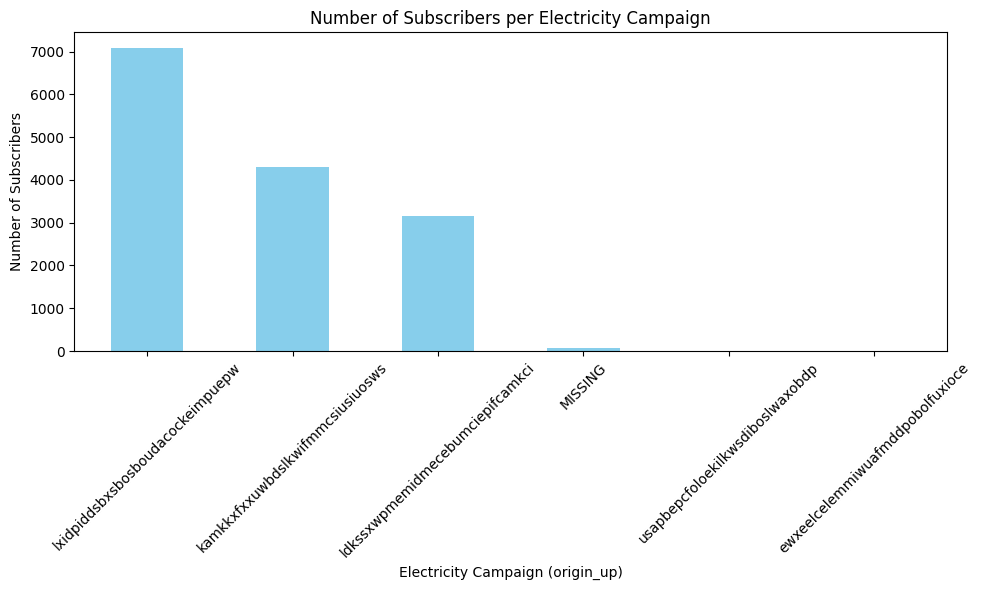

The electricity campaign with the highest number of subscribers is lxidpiddsbxsbosboudacockeimpuepw.
Number of subscribers for this campaign: 7097


In [30]:
# Which electricity campaign (origin_up) has the highest number of subscribers?

# Count the number of subscribers for each electricity campaign
campaign_counts = df1['origin_up'].value_counts()

# Visualization - Bar plot for campaign counts
plt.figure(figsize=(10, 6))
campaign_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Electricity Campaign (origin_up)')
plt.ylabel('Number of Subscribers')
plt.title('Number of Subscribers per Electricity Campaign')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the campaign with the highest number of subscribers
max_subscribers_campaign = campaign_counts.idxmax()
max_subscribers_count = campaign_counts.max()

print(f'The electricity campaign with the highest number of subscribers is {max_subscribers_campaign}.')
print(f'Number of subscribers for this campaign: {max_subscribers_count}')




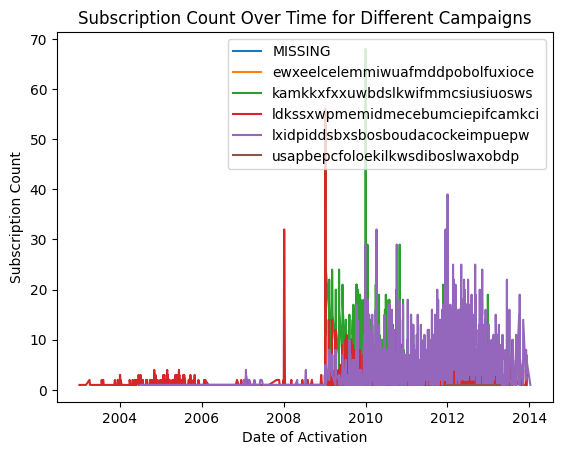

In [32]:
# How has the subscription count changed over time for different campaigns?


# Convert 'date_activ' to datetime
df1['date_activ'] = pd.to_datetime(df1['date_activ'])

# Group by 'origin_up' and 'date_activ' to count subscriptions
campaign_subscriptions = df1.groupby(['origin_up', 'date_activ']).size().reset_index(name='subscriptions')

# Plot the subscription count for each campaign
for campaign in campaign_subscriptions['origin_up'].unique():
    campaign_data = campaign_subscriptions[campaign_subscriptions['origin_up'] == campaign]
    plt.plot(campaign_data['date_activ'], campaign_data['subscriptions'], label=campaign)

plt.xlabel('Date of Activation')
plt.ylabel('Subscription Count')
plt.title('Subscription Count Over Time for Different Campaigns')
plt.legend()
plt.show()
